In [1]:
import xarray as xr
from matplotlib import pyplot as plt
import numpy as np

import os

In [2]:
bridges = ['cffi', 'pipes', 'mpi']

Change this to your experiment root directory

In [3]:
expdir = '/work/ka1176/caroline/gitlab/icon-aes/experiments/'

In [4]:
fortran_reference = os.path.join(expdir, 'atm_amip_iconml_emission_fortran')

Output file for reference (note it is not regridded)

In [5]:
outputfile = 'atm_amip_iconml_emission_fortran_atm_3d_ml_19790101T001600Z.nc'

In [6]:
ds_fortran = xr.open_dataset( os.path.join(fortran_reference, outputfile) )

In [7]:
ds_fortran.qttr_phy

<xarray.DataArray 'qttr_phy' (time: 1, height: 47, ncells: 20480)>
[962560 values with dtype=float64]
Coordinates:
    clon     (ncells) float32 ...
    clat     (ncells) float32 ...
  * height   (height) float64 1.0 2.0 3.0 4.0 5.0 ... 43.0 44.0 45.0 46.0 47.0
  * time     (time) float64 1.979e+07
Dimensions without coordinates: ncells
Attributes:
    standard_name:                mass_fraction_of_ttr_in_air
    long_name:                    mass fraction of ttr in air (physics)
    units:                        kg kg-1
    param:                        2.20.0
    CDI_grid_type:                unstructured
    number_of_grid_in_reference:  1

Ignore the regridding for now and just plot the variable to see if it is not empty

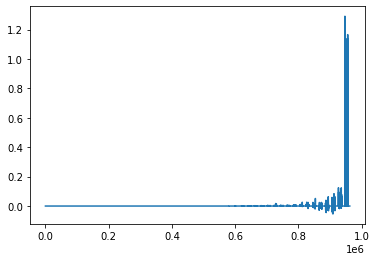

In [8]:
plt.plot(ds_fortran.qttr_phy.values.flatten())

In [9]:
for bridge in bridges:
    print('*'*30)
    print(' Bridge: ', bridge)
    print('*'*30)
        
    f = os.path.join(expdir, 
                     f'atm_amip_iconml_emission_{bridge}', 
                     f'atm_amip_iconml_emission_{bridge}_atm_3d_ml_19790101T001600Z.nc')
    
    if not os.path.exists(f):
        print('  No such file: ', f)
        continue
    else:
        print('  Loading file: ', f)
    
    ds = xr.open_dataset( f )
    
    assert ds_fortran.equals(ds)

******************************
 Bridge:  cffi
******************************
  Loading file:  /work/ka1176/caroline/gitlab/icon-aes/experiments/atm_amip_iconml_emission_cffi/atm_amip_iconml_emission_cffi_atm_3d_ml_19790101T001600Z.nc
******************************
 Bridge:  pipes
******************************
  No such file:  /work/ka1176/caroline/gitlab/icon-aes/experiments/atm_amip_iconml_emission_pipes/atm_amip_iconml_emission_pipes_atm_3d_ml_19790101T001600Z.nc
******************************
 Bridge:  mpi
******************************
  No such file:  /work/ka1176/caroline/gitlab/icon-aes/experiments/atm_amip_iconml_emission_mpi/atm_amip_iconml_emission_mpi_atm_3d_ml_19790101T001600Z.nc
